In [114]:
import pandas as pd
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt

#### Initialize PyCoinGecko

In [115]:
cg = CoinGeckoAPI()

#### Coin id checker

In [116]:
coin_df = pd.DataFrame(cg.get_coins_list())
coin_df[coin_df.id.str.contains('ripple')]

,id,symbol,name
5002,ripple,xrp,XRP
5003,ripple-alpha,xla,Ripple Alpha


#### Place data in DataFrame

In [117]:
dfs = []
coins = ('bitcoin','litecoin','ripple')
for coin in coins:
    price_df = pd.DataFrame(cg.get_coin_market_chart_range_by_id(id=coin,vs_currency='usd',from_timestamp=1483228800,to_timestamp=1514764799)['prices'])
    price_df.columns = ['date_'+coin,'price_'+coin]
    dfs.append(price_df)
df = pd.concat(dfs, axis=1)
df.drop(df.columns[[2,4]],axis = 1,inplace = True)
df['date'] = pd.to_datetime(df['date_bitcoin'],unit='ms')
df

,date_bitcoin,price_bitcoin,price_litecoin,price_ripple,date
0,1483228800000,998.050000,4.503139,0.006376,2017-01-01
1,1483315200000,1019.198800,4.580077,0.006309,2017-01-02
2,1483401600000,1035.531300,4.590288,0.006385,2017-01-03
3,1483488000000,1130.849516,4.517414,0.006566,2017-01-04
4,1483574400000,990.667500,4.217183,0.006194,2017-01-05
...,...,...,...,...,...
360,1514332800000,16373.081080,271.537978,1.406450,2017-12-27
361,1514419200000,15067.899498,254.039085,1.432940,2017-12-28
362,1514505600000,15096.559436,248.070088,2.208130,2017-12-29
363,1514592000000,13620.361874,223.400325,2.176440,2017-12-30


<AxesSubplot:xlabel='date'>

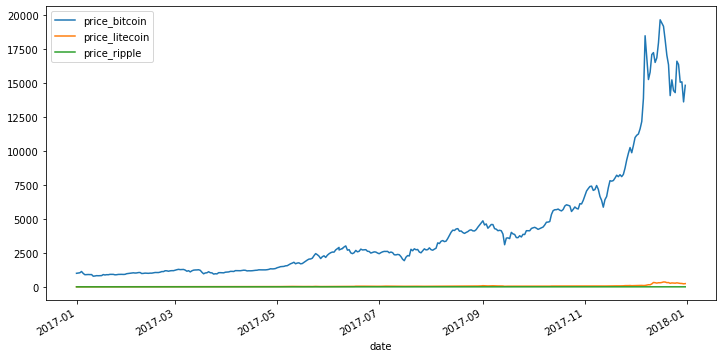

In [118]:
df.plot(x='date',y=[
    'price_bitcoin',
    'price_litecoin',
    'price_ripple'
], figsize=(12,6))

In [120]:
for coin in coins:
    df[coin+'_norm'] = df['price_'+coin]/df.iloc[0]['price_'+coin]
df

,date_bitcoin,price_bitcoin,price_litecoin,price_ripple,date,bitcoin_norm,litecoin_norm,ripple_norm
0,1483228800000,998.050000,4.503139,0.006376,2017-01-01,1.000000,1.000000,1.000000
1,1483315200000,1019.198800,4.580077,0.006309,2017-01-02,1.021190,1.017085,0.989492
2,1483401600000,1035.531300,4.590288,0.006385,2017-01-03,1.037555,1.019353,1.001412
3,1483488000000,1130.849516,4.517414,0.006566,2017-01-04,1.133059,1.003170,1.029799
4,1483574400000,990.667500,4.217183,0.006194,2017-01-05,0.992603,0.936499,0.971455
...,...,...,...,...,...,...,...,...
360,1514332800000,16373.081080,271.537978,1.406450,2017-12-27,16.405071,60.299715,220.585006
361,1514419200000,15067.899498,254.039085,1.432940,2017-12-28,15.097339,56.413782,224.739649
362,1514505600000,15096.559436,248.070088,2.208130,2017-12-29,15.126055,55.088263,346.319009
363,1514592000000,13620.361874,223.400325,2.176440,2017-12-30,13.646973,49.609915,341.348808


#### Portfolio Allocation

In [122]:
allocation = {'bitcoin':500,'litecoin':250,'ripple':250}
for coin in coins:
    df[coin+'_value'] = df[coin+'_norm']*allocation[coin]
df

,date_bitcoin,price_bitcoin,price_litecoin,price_ripple,date,bitcoin_norm,litecoin_norm,ripple_norm,bitcoin_value,litecoin_value,ripple_value
0,1483228800000,998.050000,4.503139,0.006376,2017-01-01,1.000000,1.000000,1.000000,500.000000,250.000000,250.000000
1,1483315200000,1019.198800,4.580077,0.006309,2017-01-02,1.021190,1.017085,0.989492,510.595060,254.271369,247.372961
2,1483401600000,1035.531300,4.590288,0.006385,2017-01-03,1.037555,1.019353,1.001412,518.777266,254.838272,250.352886
3,1483488000000,1130.849516,4.517414,0.006566,2017-01-04,1.133059,1.003170,1.029799,566.529491,250.792515,257.449812
4,1483574400000,990.667500,4.217183,0.006194,2017-01-05,0.992603,0.936499,0.971455,496.301538,234.124667,242.863864
...,...,...,...,...,...,...,...,...,...,...,...
360,1514332800000,16373.081080,271.537978,1.406450,2017-12-27,16.405071,60.299715,220.585006,8202.535484,15074.928753,55146.251568
361,1514419200000,15067.899498,254.039085,1.432940,2017-12-28,15.097339,56.413782,224.739649,7548.669655,14103.445581,56184.912171
362,1514505600000,15096.559436,248.070088,2.208130,2017-12-29,15.126055,55.088263,346.319009,7563.027622,13772.065791,86579.752196
363,1514592000000,13620.361874,223.400325,2.176440,2017-12-30,13.646973,49.609915,341.348808,6823.486736,12402.478667,85337.202008
